True


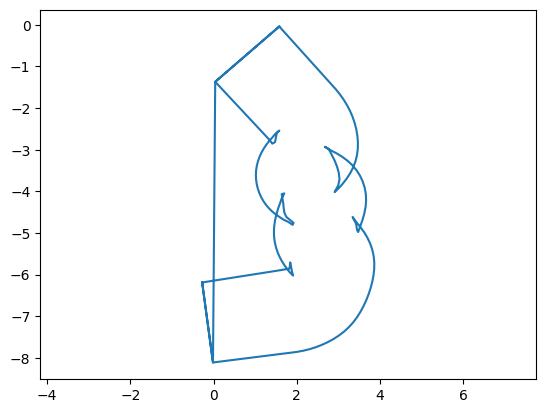

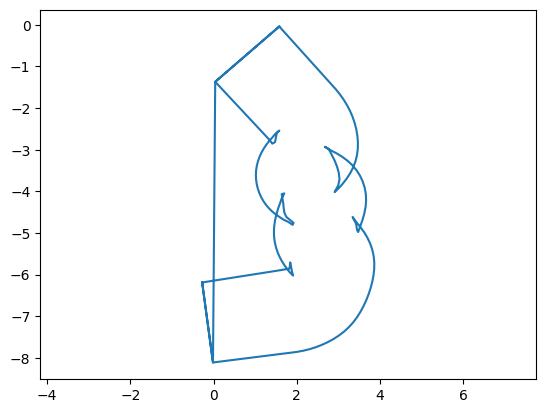

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Import the Path class from your env.py file
from factory_env.envs.parameters import env_param, path_param, reward_param, ATR_param, sensor_param
from factory_env.map.env_path import Path
from shapely.geometry import Polygon, Point, LineString, LinearRing
from scipy.interpolate import splprep, splev

import pickle

params = env_param()
path_instance = Path(params.path_param, params.atr_param.atr_linear_vel_max)
path_instance = pickle.load(open("path_instance.pkl", "rb"))

# Create a polygon
polygon = path_instance.bounding_box_polygon
is_hit_wall = path_instance.bounding_box_polygon.contains(Point(np.array([1, -7])))
print(is_hit_wall)
# Visualize it
x,y = polygon.exterior.xy
# plt.plot(x, y, 'blue')
# plt.fill(x, y, alpha=0.5)

# plt.scatter(3.118, -3.364, c='r', s=100)

def smooth_line(line, smoothness=0):
    tck, u = splprep([line[:,0], line[:,1]], s=smoothness)
    new_points = splev(np.linspace(0, 1, 100), tck)
    return np.column_stack(new_points)

smooth_wall_up = smooth_line(path_instance.wall_up)
smooth_wall_down = smooth_line(path_instance.wall_down)
smooth_start_line = smooth_line(path_instance.start_line)
smooth_end_line = smooth_line(path_instance.end_line[::-1])  # Reverse to ensure connectivity
exterior = np.vstack([smooth_start_line, smooth_wall_up, smooth_end_line, smooth_wall_down])

fig, ax = plt.subplots()
ax.plot(exterior[:,0], exterior[:,1], '-')
ax.set_aspect('equal', 'datalim')
plt.show()

fig, ax = plt.subplots()
ax.plot(exterior[:,0], exterior[:,1], '-')
ax.set_aspect('equal', 'datalim')
plt.show()

plt.show()


In [4]:
import numpy as np

# Example array with 'inf' and 'nan' values
array_with_inf_and_nan = np.array([np.inf, -np.inf, np.nan, 1, 2])

# Replace 'inf' and 'nan' with 0
array_with_inf_and_nan = np.nan_to_num(array_with_inf_and_nan, nan=0.0, posinf=0.0, neginf=0.0)

print(array_with_inf_and_nan)

[0. 0. 0. 1. 2.]
